### Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing the dataset
house = pd.read_csv("train.csv")
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Shape of dataset
house.shape

(1460, 81)

In [4]:
# Info about dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Statistical info (transpose function used to display complete table)
house.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### EXPLORATORY DATA ANALYSIS & OUTLIER TREATMENT:

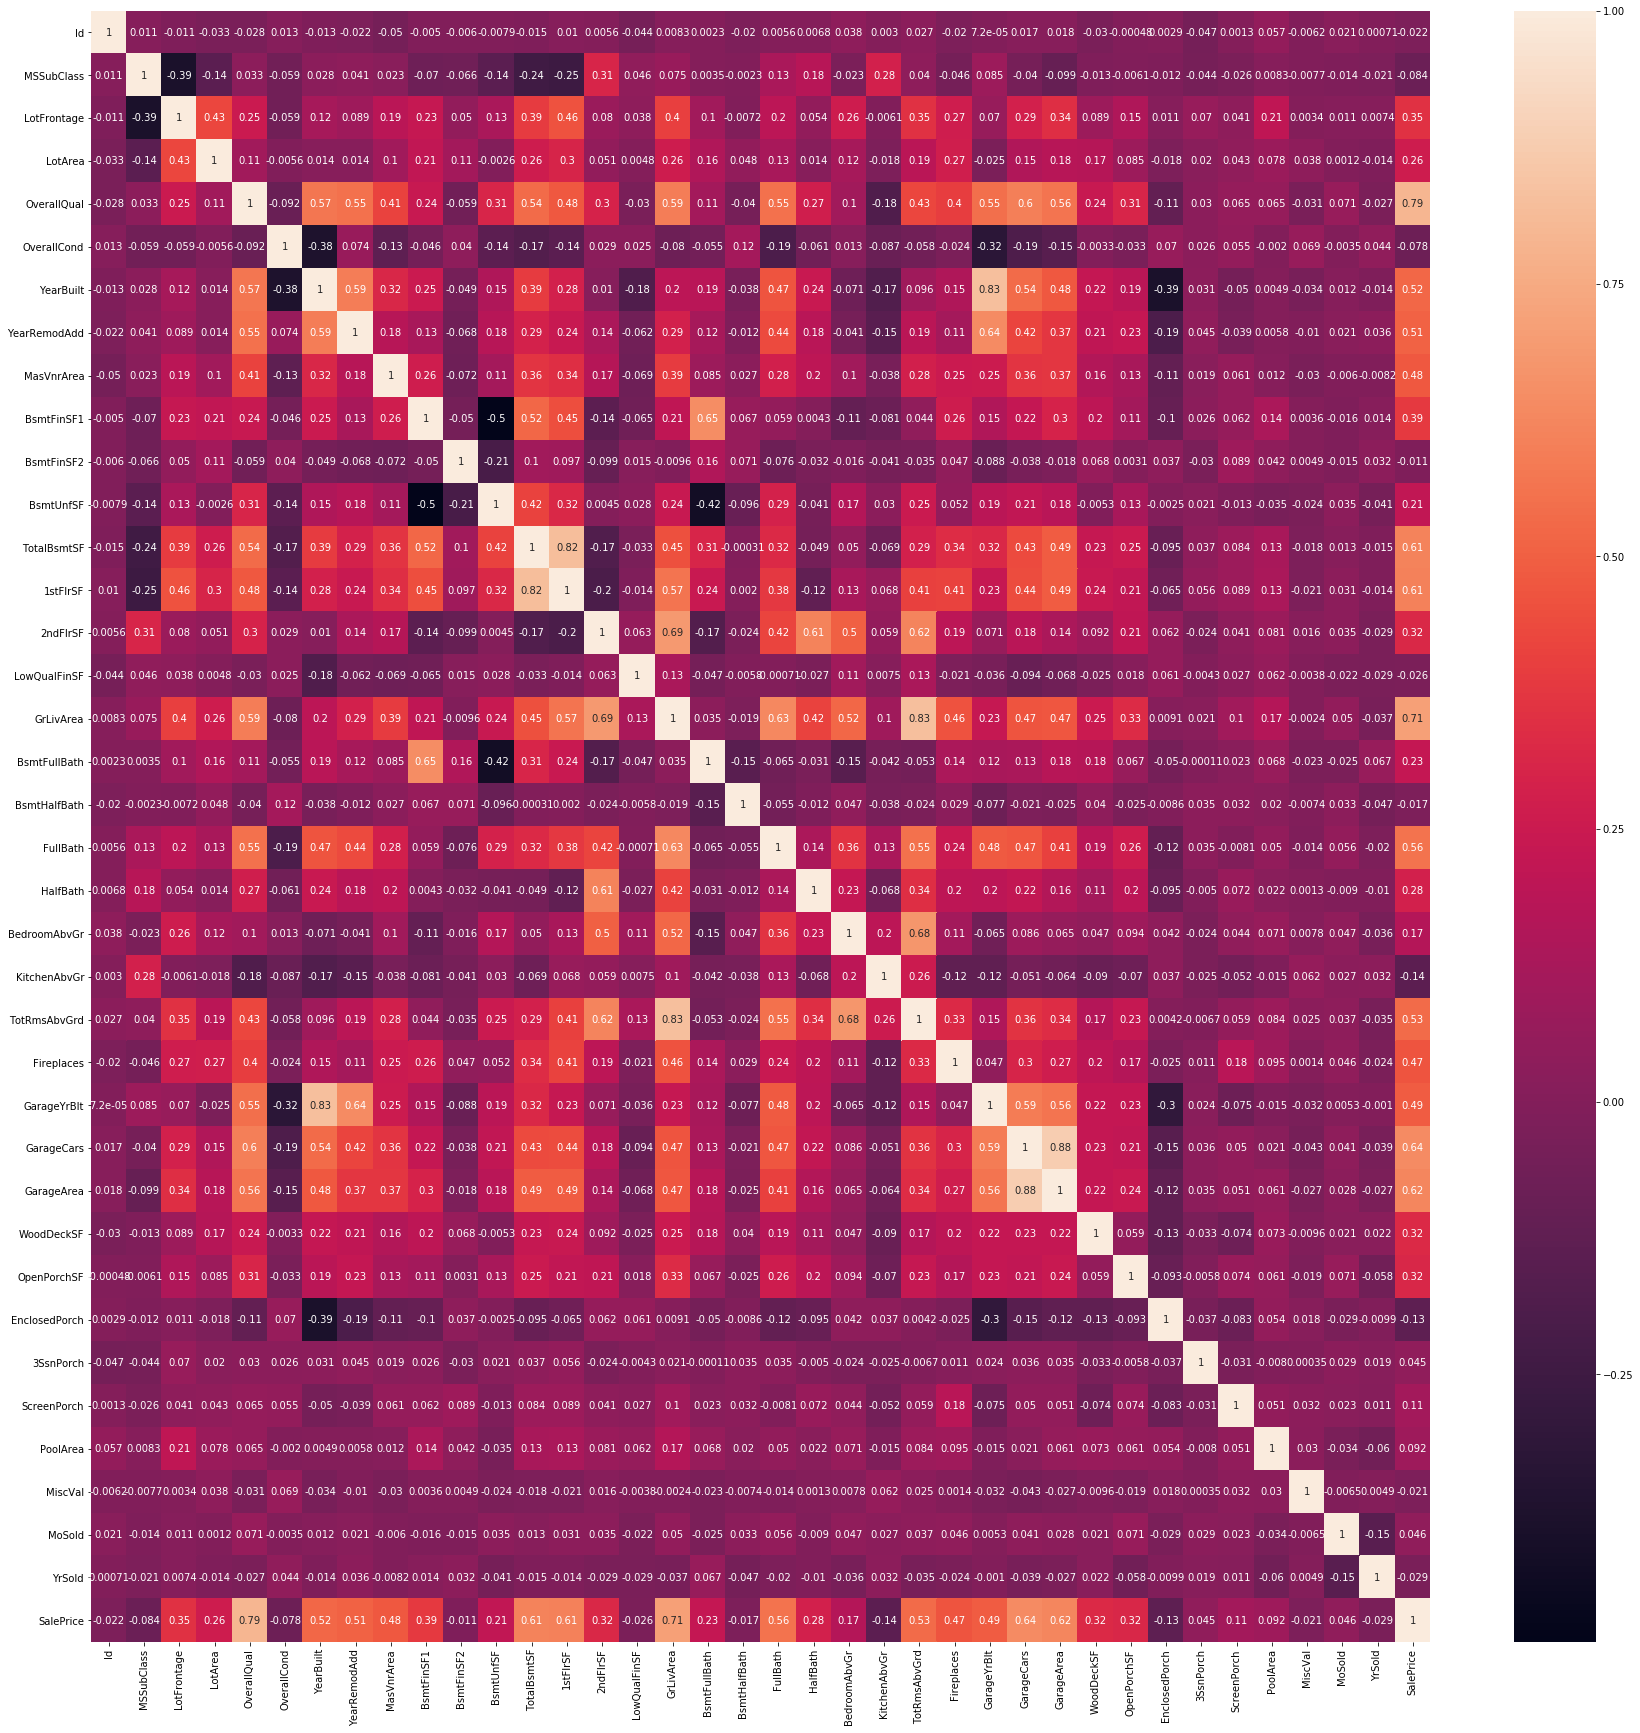

In [6]:
# Plotting correlations on heatmap
corr = house.corr()
plt.subplots(figsize=(30,30))
sns.heatmap(corr, annot=True)

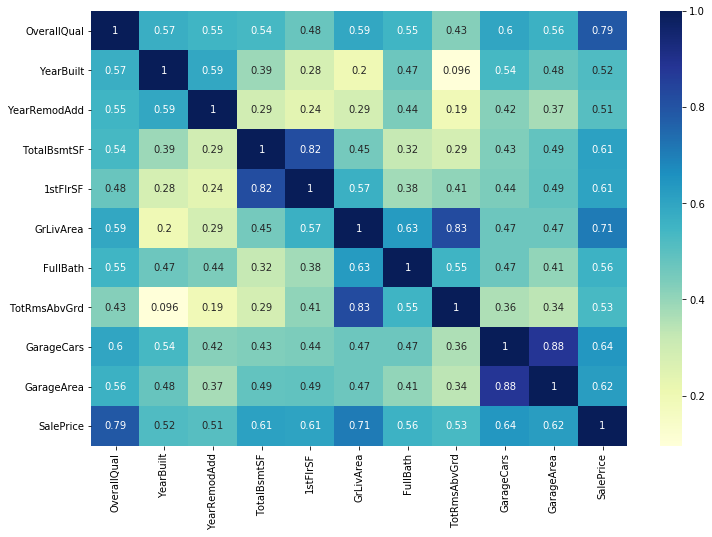

In [7]:
# Since SalePrice is our target variable, let's look at features which show more than 50% correlation with SalePrice. 
top_50 = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = house[top_50].corr()
sns.heatmap(top_corr,cmap="YlGnBu", annot=True)
plt.show()

From the heatmap plotted above, we can see that SalePrice is highly correlated to OverallQual (79%). 

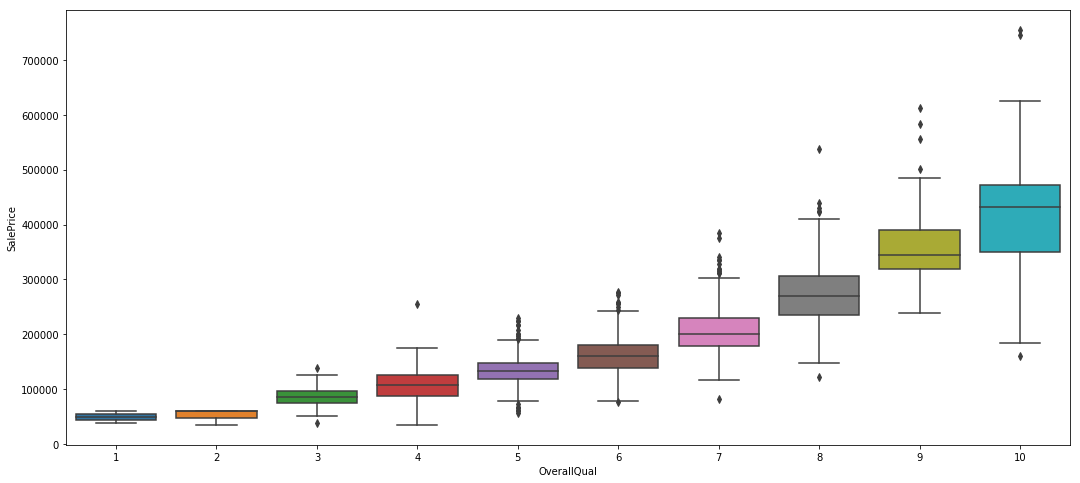

In [8]:
# Plotting a boxplot of OverallQual vs SalePrice 
plt.figure(figsize=(18, 8))
sns.boxplot(x=house.OverallQual, y=house.SalePrice)

From the boxplots, it can be deduced that as the OverallQual increases, the SalePrice also increases. We do see lot of outliers here though. We will look at the features correlated with SalePrice one by one with the help of scatter plots and then treat them for outliers, if required.

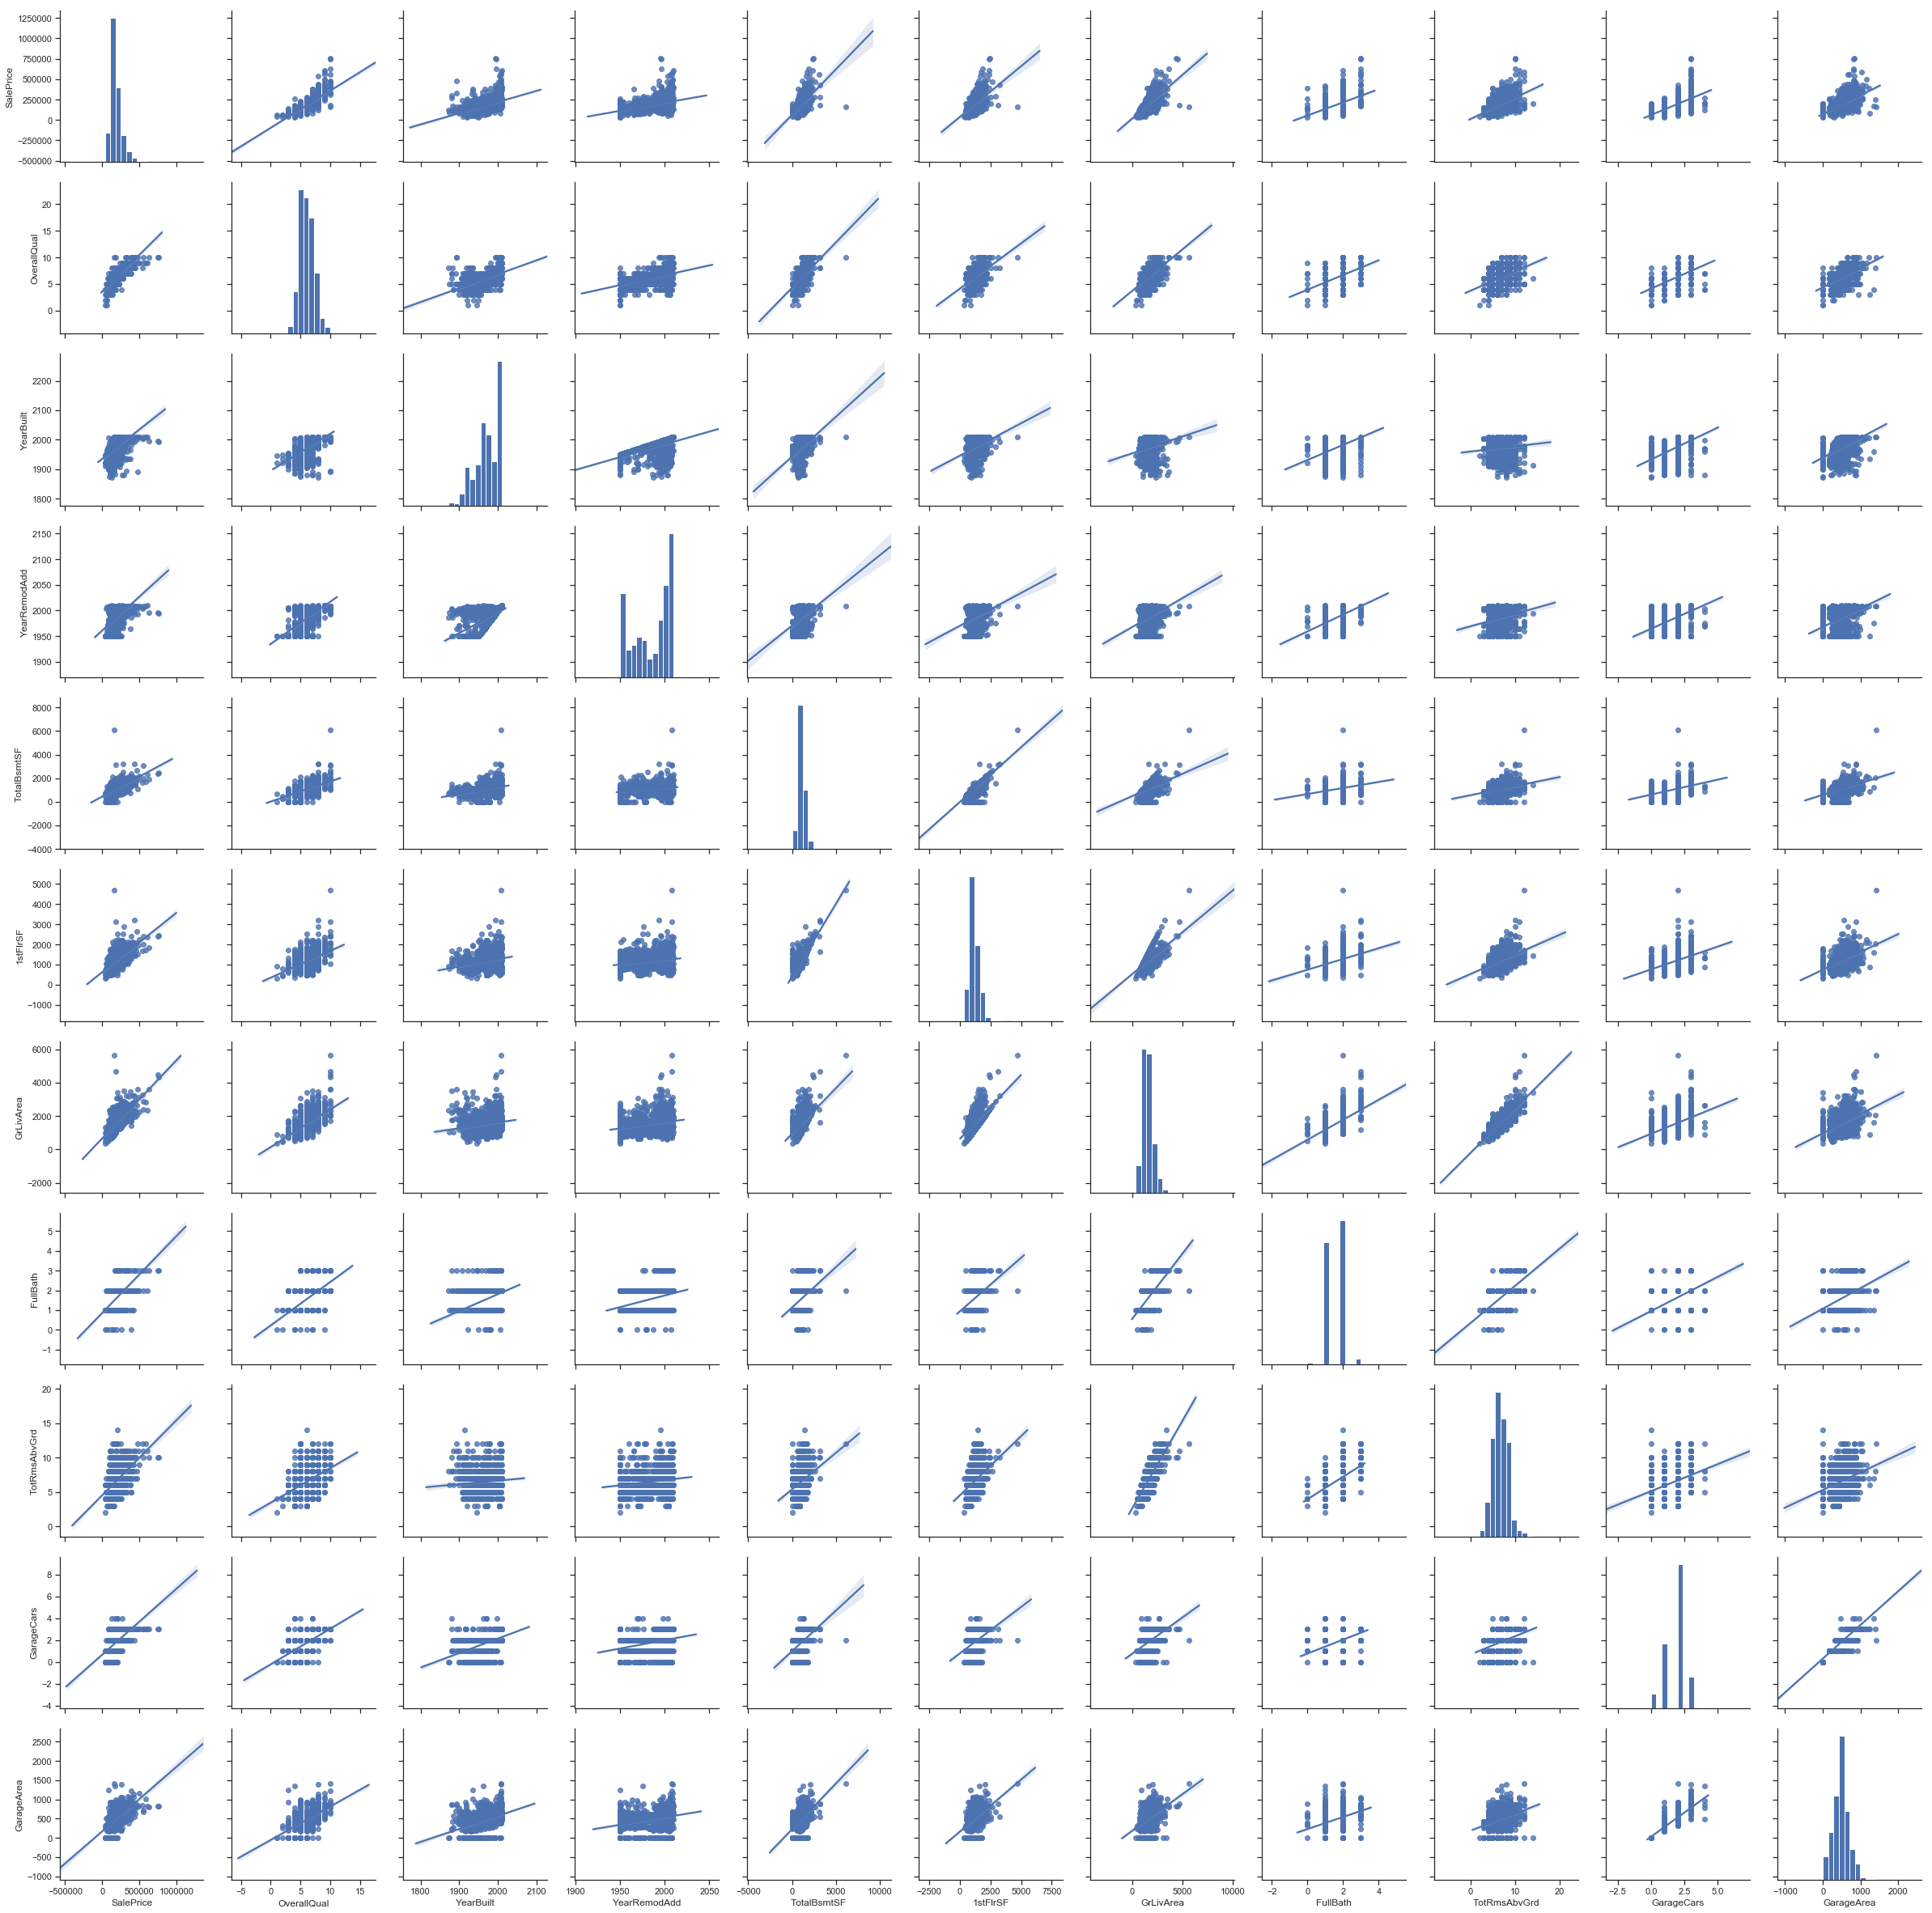

In [9]:
# Let's look at pair plots
col = ['SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']
sns.set(style='ticks')
sns.pairplot(house[col], size=3, kind='reg')

Since these pair plots are not clear enough, we will look at the features as required.

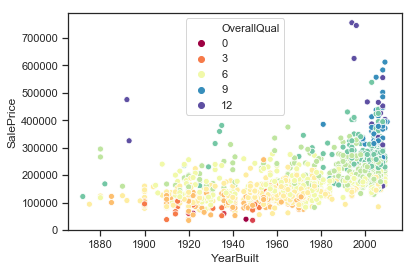

In [10]:
# Feature: YearBuilt 
sns.scatterplot(x = house.YearBuilt, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

From this, we can see that older the houses, lesser the price. Newer houses with OverallQual high are priced at higher SalePrice.

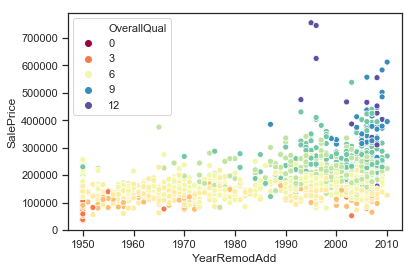

In [11]:
# Feature: YearRemodAdd
sns.scatterplot(x = house.YearRemodAdd, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

This shows that the recent remodelling of the house results in increased Saleprice, which seems like a fair representation. 

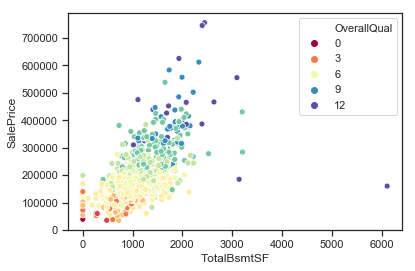

In [12]:
# Feature: TotalBsmtSF (Total square feet of basement area)
sns.scatterplot(x = house.TotalBsmtSF, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

We can see that as the area of basement increases, the SalePrice goes up with respect to OverallQual.

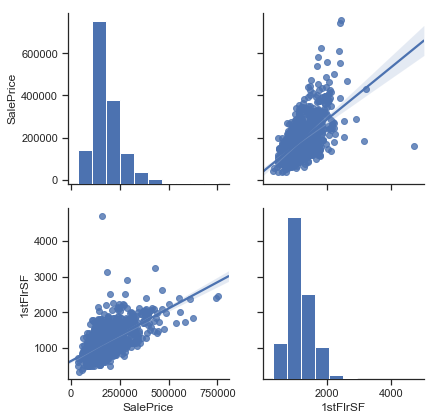

In [13]:
# Feature: 1stFlrSF
col = ['SalePrice', '1stFlrSF']
sns.set(style='ticks')
sns.pairplot(house[col], size=3, kind='reg')

Pair plots look decent enough with good scatter of data points.

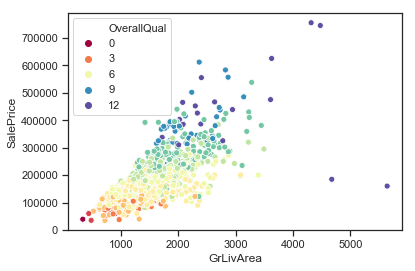

In [14]:
# Feature: GrLivArea
sns.scatterplot(x = house.GrLivArea, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

From this, we can see that as ground living area increses, the price inceases, with respect to Overall Quality. Hence, outliers seen towards the bottom right corner of the plot do not make sense. We need to get rid of them. 

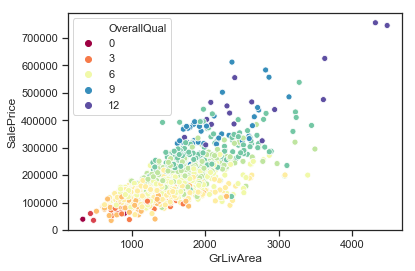

In [15]:
# Removing the outliers & checking the scatterplot again.
house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice']<250000)].index).reset_index(drop=True)
sns.scatterplot(x = house.GrLivArea, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

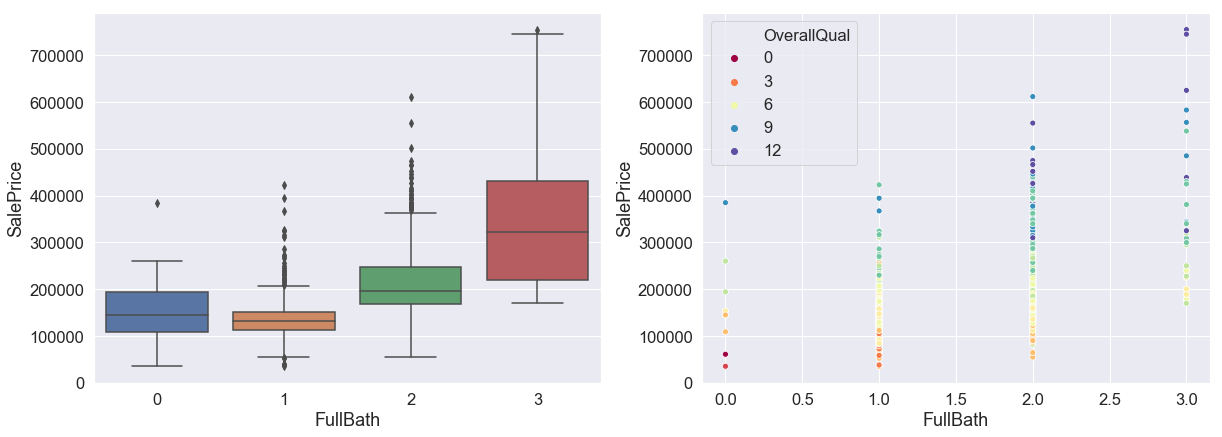

In [16]:
# Feature: FullBath
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
fig1 = fig.add_subplot(221); 
sns.boxplot(x=house.FullBath, y=house.SalePrice, data=house[['FullBath', 'SalePrice']])
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = house.FullBath, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

We can see that SalePrice increases with increase in number of full baths.


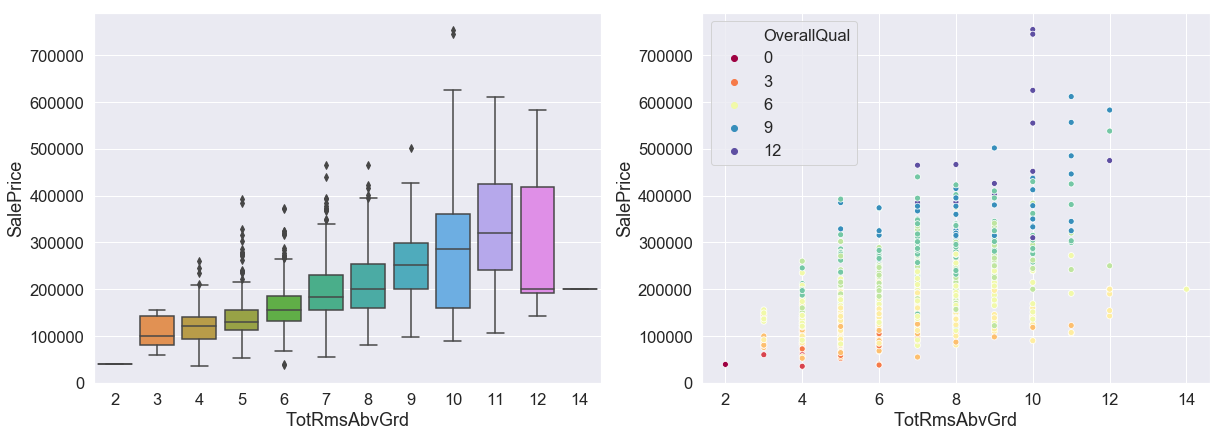

In [17]:
# Feature: TotRmsAbvGrd
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
fig1 = fig.add_subplot(221); 
sns.boxplot(x=house.TotRmsAbvGrd, y=house.SalePrice, data=house[['FullBath', 'SalePrice']])
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = house.TotRmsAbvGrd, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

SalePrice is directly prpoprtional to the total rooms above grade, which means that as number of rooms increase, the price increases. But, it can be observed from the box-plots that for rooms beyond 11, the mean price shows a decrease. It could be related to OverallQual as well. Hence, we will leave it as it. 

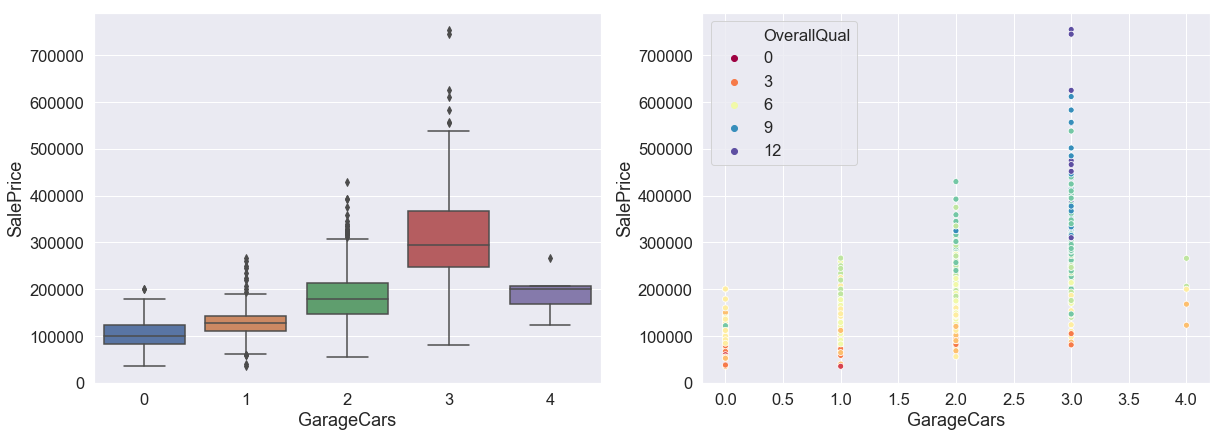

In [18]:
# Feature: GarageCars
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
fig1 = fig.add_subplot(221); 
sns.boxplot(x=house.GarageCars, y=house.SalePrice, data=house[['FullBath', 'SalePrice']])
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = house.GarageCars, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

More the number of garages, higher the price. This can be observed in box-plot and scatter-plot above. But, there seems to be some anamoly for GarageCars = 4. Hence, these outliers will be removed.

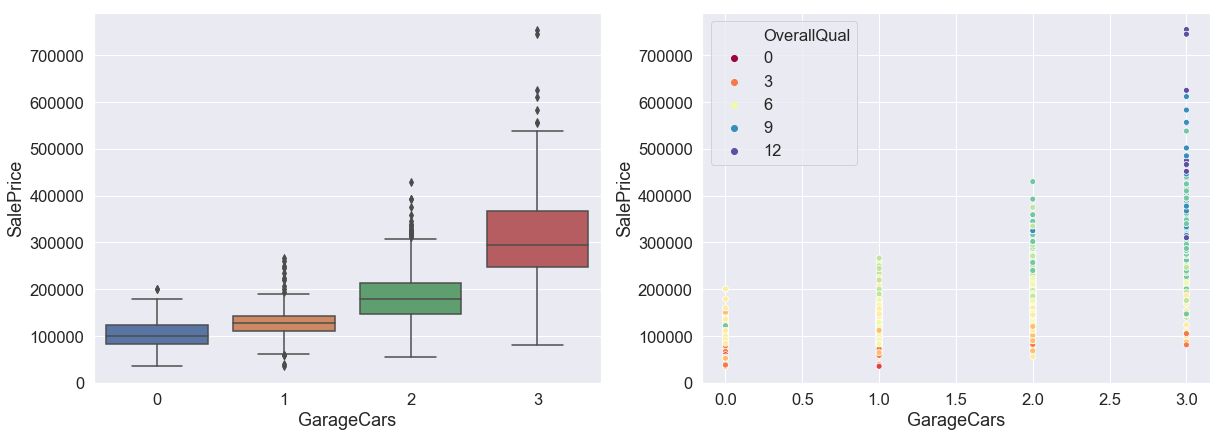

In [19]:
# Removing outliers and checking the plots again. 
house = house.drop(house[(house['GarageCars']>3) & (house['SalePrice']<280000)].index).reset_index(drop=True)
fig = plt.figure(figsize=(20, 15))
sns.set(font_scale=1.5)
fig1 = fig.add_subplot(221); 
sns.boxplot(x=house.GarageCars, y=house.SalePrice, data=house[['FullBath', 'SalePrice']])
fig2 = fig.add_subplot(222); 
sns.scatterplot(x = house.GarageCars, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

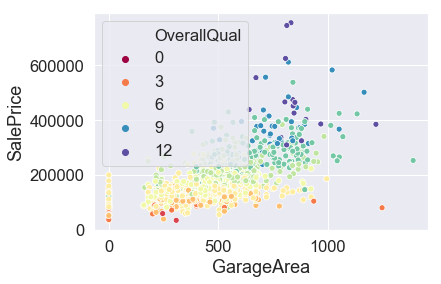

In [20]:
# Feature: GarageArea
sns.scatterplot(x = house.GarageArea, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

We can observe that as garage area increses, the price inceases, with respect to Overall Quality. Hence, outliers seen beyond 1000 sq ft of area and SalePrice of 300000 will be removed. 

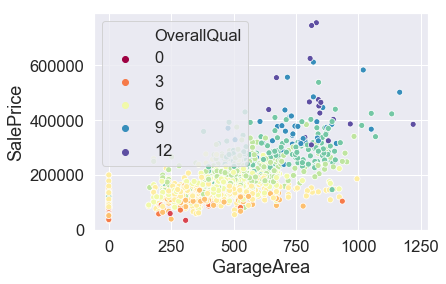

In [21]:
house = house.drop(house[(house['GarageArea']>1000) & (house['SalePrice']<300000)].index).reset_index(drop=True)
sns.scatterplot(x = house.GarageArea, y = house.SalePrice, hue=house.OverallQual, palette= 'Spectral')

In [22]:
# Checking shape of data
house.shape

(1448, 81)

### Data cleaning

In [23]:
# Processing Year columns to get the 'age' of respective feature (Current year = 2019)
house['AgeBuilt'] = 2019 - house['YearBuilt']
house['AgeRemodAdd'] = 2019 - house['YearRemodAdd']
house['AgeGarageBlt'] = 2019 - house['GarageYrBlt']
house['AgeSold'] = 2019 - house['YrSold']
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,16,16,16.0,11
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,43,43,43.0,12
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,18,17,18.0,11
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,104,49,21.0,13
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,19,19,19.0,11


In [24]:
# Dropping original year columns
house = house.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'],axis=1)
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,WD,Normal,208500,16,16,16.0,11
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,WD,Normal,181500,43,43,43.0,12
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,WD,Normal,223500,18,17,18.0,11
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,WD,Abnorml,140000,104,49,21.0,13
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,WD,Normal,250000,19,19,19.0,11


In [25]:
# Looking at the % of data that has null values
round(100*(house.isnull().sum()/len(house.index)), 2).sort_values(ascending=False)

PoolQC           99.59
MiscFeature      96.34
Alley            93.78
Fence            80.66
FireplaceQu      47.38
LotFrontage      17.82
GarageType        5.59
GarageCond        5.59
AgeGarageBlt      5.59
GarageQual        5.59
GarageFinish      5.59
BsmtFinType2      2.62
BsmtExposure      2.62
BsmtQual          2.56
BsmtCond          2.56
BsmtFinType1      2.56
MasVnrType        0.55
MasVnrArea        0.55
Electrical        0.07
ExterQual         0.00
ExterCond         0.00
Exterior2nd       0.00
Exterior1st       0.00
Foundation        0.00
RoofStyle         0.00
BsmtFinSF1        0.00
RoofMatl          0.00
HouseStyle        0.00
OverallCond       0.00
Utilities         0.00
                 ...  
EnclosedPorch     0.00
3SsnPorch         0.00
ScreenPorch       0.00
MiscVal           0.00
GarageCars        0.00
MoSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
AgeBuilt          0.00
AgeRemodAdd       0.00
GarageArea        0.00
Fireplaces 

In [26]:
# We will drop the columns having more than 30% NA values
# 'Id' column will be dropped as well since it is not required for analysis.
house = house.drop(house.loc[:,list(round(100*(house.isnull().sum()/len(house.index)), 2)>30)].columns, 1)
house = house.drop(['Id'], axis = 1)
house.shape

(1448, 75)

#### Remaining 14 columns with NA values will be studied one by one and NA values will be dropped or imputed as per data description. Data description file studied in detail to figure out the values which can be imputed in place of NA.

In [27]:
# LotFrontage (Linear feet of street connected to property)
house['LotFrontage'].describe()

count    1190.000000
mean       69.681513
std        23.212774
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [28]:
# Group by neighborhood (since we will find similar LotFrontage in a particular neighborhood).
# Fill in missing value by the median LotFrontage of all the neighborhood
house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [29]:
# Replacing NA in GarageCond, GarageType, GarageFinish and GarageQual with 'None' since Na means 'No Garage'.
for col in ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']:house[col] = house[col].fillna('None')

In [30]:
# GarageYrBlt denotes the Year garage was built, hence NA here will be replaced with 0.
for col in ['AgeGarageBlt']:house[col] = house[col].fillna(int(0))

In [31]:
# Replacing NA in BsmtExposure, BsmtFinType2,  BsmtFinType1, BsmtCond, BsmtQual with 'None' since A means 'No basement'.
for col in ('BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):house[col] = house[col].fillna('None')

In [32]:
# Replacing MasVnrArea with zero 
house['MasVnrArea'] = house['MasVnrArea'].fillna(int(0))

In [33]:
# Replacing MasVnrType with None
house['MasVnrType'] = house['MasVnrType'].fillna('None')

In [34]:
# Replacing NA in 'ELectrical' with most occuring type of electrical system (hence using mode value) 
house['Electrical'] = house['Electrical'].fillna(house['Electrical']).mode()[0]

In [35]:
# Dropping Duplicates if any. 
house.drop_duplicates(keep='first',inplace=True)
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1447
Data columns (total 75 columns):
MSSubClass       1448 non-null int64
MSZoning         1448 non-null object
LotFrontage      1448 non-null float64
LotArea          1448 non-null int64
Street           1448 non-null object
LotShape         1448 non-null object
LandContour      1448 non-null object
Utilities        1448 non-null object
LotConfig        1448 non-null object
LandSlope        1448 non-null object
Neighborhood     1448 non-null object
Condition1       1448 non-null object
Condition2       1448 non-null object
BldgType         1448 non-null object
HouseStyle       1448 non-null object
OverallQual      1448 non-null int64
OverallCond      1448 non-null int64
RoofStyle        1448 non-null object
RoofMatl         1448 non-null object
Exterior1st      1448 non-null object
Exterior2nd      1448 non-null object
MasVnrType       1448 non-null object
MasVnrArea       1448 non-null float64
ExterQual        1448

In [36]:
# Datatype of 'AgeGarageBlt' changed from float to int.
house['AgeGarageBlt'] = house['AgeGarageBlt'].astype(int)
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeBuilt,AgeRemodAdd,AgeGarageBlt,AgeSold
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,WD,Normal,208500,16,16,16,11
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,WD,Normal,181500,43,43,43,12
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,WD,Normal,223500,18,17,18,11
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,WD,Abnorml,140000,104,49,21,13
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,WD,Normal,250000,19,19,19,11


In [37]:
# Checking if there are any null values or not
((house.isnull().sum() / len(house)) * 100).sort_values(ascending=False)

AgeSold          0.0
RoofMatl         0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Exterior1st      0.0
RoofStyle        0.0
HeatingQC        0.0
OverallCond      0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
                ... 
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
SaleType         0.0
SaleCondition    0.0
SalePrice        0.0
AgeBuilt         0.0
AgeRemodAdd      0.0
GarageQual       0.0
GarageCars       0.0
Electrical       0.0
GarageFinish     0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF 

Now that data is studied and cleared off null values, we will proceed with further data preparation.

### DATA PREPARATION:

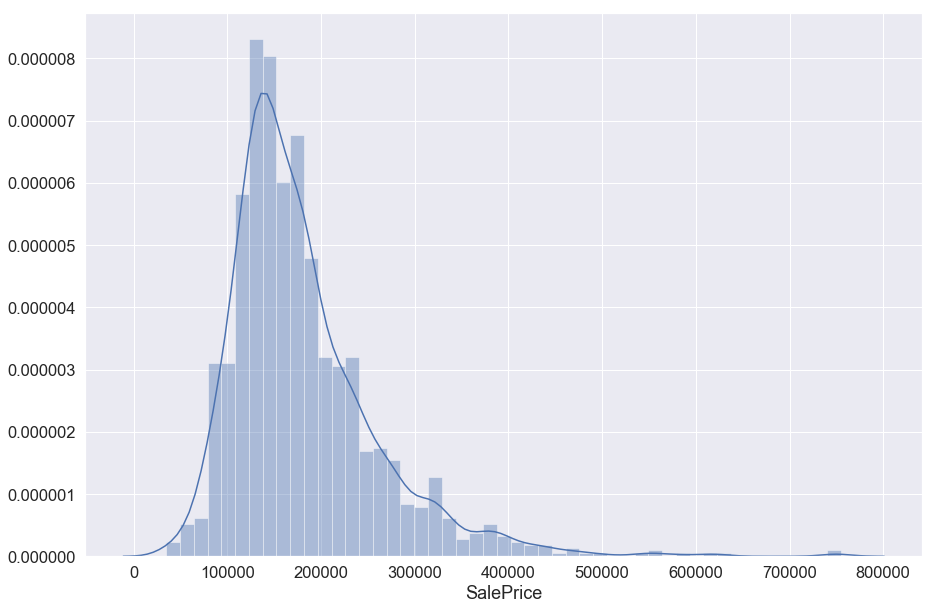

In [38]:
# Let's look at the target variable 'SalePrice' 
plt.subplots(figsize=(15,10))
sns.distplot(house['SalePrice'])

<function matplotlib.pyplot.show(*args, **kw)>

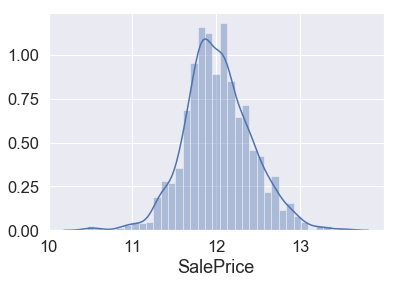

In [39]:
# Tranforming the y-variable 'SalePrice' to log
house['SalePrice'] = np.log(house['SalePrice'])
sns.distplot(house['SalePrice'])
plt.show

We will create dummy variables for catergorical columns. 

In [40]:
# Getting dummy variables and storing in a new dataframe df.
df = pd.get_dummies(house)
df.shape

(1448, 275)

In [41]:
# New df
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


### TEST-TRAIN DATA SPLIT:

In [42]:
from sklearn.model_selection import train_test_split

# Putting feature variables to X
X = df.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,1,0,0,0,0,1,0


In [43]:
# Putting target variable to y
y = df['SalePrice']
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64

In [44]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
# Standardizing the data
# Applying StandardScaler to numeric variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_var = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 
           'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
           'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 
           'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
           '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']

X_train[num_var] = scaler.fit_transform(X_train[num_var])

X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
810,-0.856371,0.159295,0.118671,-0.783270,0.335626,-0.579650,0.090219,-0.291533,-0.078908,-0.099762,...,0,0,0,1,0,0,0,0,1,0
859,-0.856371,0.159295,-0.163577,-0.783270,0.335626,-0.155887,0.874831,-0.291533,-0.879885,-0.114427,...,0,0,0,1,0,0,0,0,1,0
1228,0.091980,-1.402623,0.220808,0.661999,-0.559083,-0.579650,-1.024758,-0.291533,0.669130,-0.493273,...,0,0,0,1,0,0,0,0,1,0
146,-0.619283,-0.914524,-0.441077,-0.783270,1.230335,-0.579650,-0.545272,-0.291533,-0.115735,-0.815903,...,0,0,0,1,0,0,0,0,1,0
981,-0.856371,0.647394,-0.014908,2.107268,-0.559083,1.929475,2.751479,-0.291533,-0.626702,2.153759,...,0,1,0,0,0,0,0,0,0,1


### MODEL BUILDING:

#### RECURSIVE FEATURE ELEMINATION (RFE): 
Using RFE to select important features.

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Running RFE with the output number of the variable equal to 60
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 60)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 182),
 ('LotFrontage', False, 191),
 ('LotArea', False, 169),
 ('OverallQual', False, 161),
 ('OverallCond', False, 166),
 ('MasVnrArea', False, 204),
 ('BsmtFinSF1', False, 156),
 ('BsmtFinSF2', False, 158),
 ('BsmtUnfSF', False, 157),
 ('TotalBsmtSF', False, 155),
 ('1stFlrSF', False, 164),
 ('2ndFlrSF', False, 165),
 ('LowQualFinSF', False, 207),
 ('GrLivArea', False, 159),
 ('BsmtFullBath', False, 180),
 ('BsmtHalfBath', False, 194),
 ('FullBath', False, 196),
 ('HalfBath', False, 181),
 ('BedroomAbvGr', False, 200),
 ('KitchenAbvGr', False, 178),
 ('TotRmsAbvGrd', False, 197),
 ('Fireplaces', False, 177),
 ('GarageCars', False, 167),
 ('GarageArea', False, 175),
 ('WoodDeckSF', False, 183),
 ('OpenPorchSF', False, 187),
 ('EnclosedPorch', False, 193),
 ('3SsnPorch', False, 190),
 ('ScreenPorch', False, 184),
 ('PoolArea', False, 186),
 ('MiscVal', False, 185),
 ('MoSold', False, 192),
 ('AgeBuilt', False, 199),
 ('AgeRemodAdd', False, 201),
 ('AgeGarageBlt',

In [49]:
col = X_train.columns[rfe.support_]
col

Index(['Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Ex',
       'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_None', 'BsmtQual_TA',
       'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_None', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn',
       'BsmtExposure_No', 'BsmtExposure_None', 'BsmtFinType2_None',
       'Heating_Grav', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd',
       'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y',
       'GarageFinish_None', 'GarageQual_Ex', 'GarageQual_Fa', 'GarageQual_Gd',
       'GarageQual_None', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Ex',
       'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA',
       'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'SaleType_COD',
       'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_New', 'SaleT

In [50]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_None',
       'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf',
       'GarageCond_None'],
      dtype='object', length=214)

In [51]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.head()

,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
810,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
859,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1228,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
146,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
981,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


#### RIDGE REGRESSION:

In [52]:
# list of alphas to tune
params = {'alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.01, 0.1, 1.0, 5.0, 10.0, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [53]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.017189,0.021552,0.002997,0.001094,0.01,{'alpha': 0.01},-0.211434,-0.188003,-0.199691,-0.189562,...,-0.194851,0.009604,5,-0.176890,-0.184424,-0.180310,-0.181344,-0.184505,-0.181495,0.002838
1,0.005797,0.000748,0.002198,0.000400,0.1,{'alpha': 0.1},-0.211316,-0.187177,-0.199692,-0.189373,...,-0.194556,0.009771,4,-0.177010,-0.184953,-0.180746,-0.181840,-0.184727,-0.181855,0.002917
2,0.005397,0.000489,0.002198,0.000400,1,{'alpha': 1.0},-0.210383,-0.187271,-0.199377,-0.188483,...,-0.193863,0.009786,2,-0.177913,-0.186945,-0.182670,-0.183910,-0.186081,-0.183504,0.003181
3,0.004998,0.000895,0.001998,0.000632,5,{'alpha': 5.0},-0.208353,-0.189480,-0.199465,-0.187084,...,-0.193767,0.008907,1,-0.180383,-0.188682,-0.184917,-0.186381,-0.188496,-0.185772,0.003034
4,0.007796,0.002924,0.002199,0.000980,10,{'alpha': 10.0},-0.207117,-0.191437,-0.200184,-0.187165,...,-0.194409,0.008072,3,-0.182189,-0.190078,-0.186577,-0.188119,-0.190157,-0.187424,0.002937
5,0.005397,0.000799,0.001799,0.000400,50,{'alpha': 50},-0.207886,-0.201497,-0.208137,-0.191130,...,-0.200633,0.006902,6,-0.191374,-0.197909,-0.194937,-0.196858,-0.198446,-0.195905,0.002563
6,0.005199,0.001601,0.001197,0.000395,100,{'alpha': 100},-0.211316,-0.209003,-0.216453,-0.194957,...,-0.206767,0.007500,7,-0.199434,-0.204803,-0.202072,-0.204326,-0.205118,-0.203151,0.002143


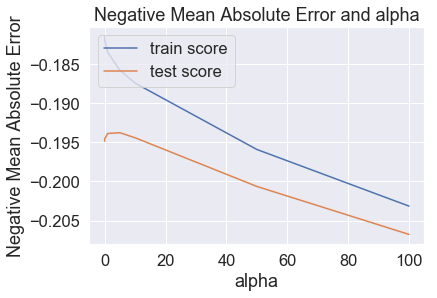

In [54]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [55]:
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
ridge.coef_

array([ 3.46321206e-03,  3.91367004e-03,  9.40295401e-02, -3.30483579e-02,
       -2.46871328e-02, -4.36709315e-02,  3.72351983e-01, -2.06755996e-01,
        4.75566307e-02, -6.11749912e-02, -1.51977627e-01, -2.17002930e-02,
        1.20013360e-01, -6.11749912e-02, -1.15830946e-01,  7.86928705e-02,
       -3.43121470e-02,  1.27674803e-01,  4.65923728e-02, -7.20704512e-02,
       -6.78845774e-02, -6.11749912e-02, -1.87451138e-01,  6.94973946e-02,
        5.82412513e-03,  9.28932721e-03, -5.04417633e-02, -3.41690836e-02,
       -9.97551471e-02,  9.97551471e-02, -1.17115139e-01,  1.35400041e-01,
       -1.06884057e-01,  1.26595145e-01, -1.17115139e-01,  1.37756472e-03,
       -3.93735548e-02, -3.87041111e-02, -6.55556223e-03,  4.73057168e-02,
        2.08284481e-02,  9.42406475e-02, -3.37616535e-02, -1.21164950e-02,
        4.58781485e-02, -3.18782993e-02,  2.92388487e-04,  1.82463258e-02,
        6.17917460e-02, -6.44677522e-03, -2.02596150e-02,  6.35120091e-02,
       -2.16264982e-02, -

In [56]:
# Ridge parameters and corresponding coefficients
model_parameters = list(ridge.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = col
cols = cols.insert(0, "constant")
ridge_p = list(zip(cols, model_parameters))
ridge_p

[('constant', 277247816.182),
 ('Foundation_BrkTil', 0.003),
 ('Foundation_CBlock', 0.004),
 ('Foundation_PConc', 0.094),
 ('Foundation_Slab', -0.033),
 ('Foundation_Stone', -0.025),
 ('Foundation_Wood', -0.044),
 ('BsmtQual_Ex', 0.372),
 ('BsmtQual_Fa', -0.207),
 ('BsmtQual_Gd', 0.048),
 ('BsmtQual_None', -0.061),
 ('BsmtQual_TA', -0.152),
 ('BsmtCond_Fa', -0.022),
 ('BsmtCond_Gd', 0.12),
 ('BsmtCond_None', -0.061),
 ('BsmtCond_Po', -0.116),
 ('BsmtCond_TA', 0.079),
 ('BsmtExposure_Av', -0.034),
 ('BsmtExposure_Gd', 0.128),
 ('BsmtExposure_Mn', 0.047),
 ('BsmtExposure_No', -0.072),
 ('BsmtExposure_None', -0.068),
 ('BsmtFinType2_None', -0.061),
 ('Heating_Grav', -0.187),
 ('HeatingQC_Ex', 0.069),
 ('HeatingQC_Fa', 0.006),
 ('HeatingQC_Gd', 0.009),
 ('HeatingQC_Po', -0.05),
 ('HeatingQC_TA', -0.034),
 ('CentralAir_N', -0.1),
 ('CentralAir_Y', 0.1),
 ('GarageFinish_None', -0.117),
 ('GarageQual_Ex', 0.135),
 ('GarageQual_Fa', -0.107),
 ('GarageQual_Gd', 0.127),
 ('GarageQual_None', -0.1

In [57]:
# Creating a dataframe for features with corresponding co-efficients 
final_ridge = pd.DataFrame(ridge_p)
final_ridge.head()

,0,1
0,constant,2.772478e+08
1,Foundation_BrkTil,3.000000e-03
2,Foundation_CBlock,4.000000e-03
3,Foundation_PConc,9.400000e-02
4,Foundation_Slab,-3.300000e-02


In [58]:
# Keeping only those features which have non-zero co-efficients
final_ridge = final_ridge[(final_ridge != 0).all(1)]
final_ridge.shape

(60, 2)

#### LASSO REGRESSION:

In [59]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.005]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.005]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023384,0.018950,0.001800,0.000750,0.0001,{'alpha': 0.0001},-0.210712,-0.185424,-0.198553,-0.188896,...,-0.193802,0.009742,6,-0.177384,-0.185410,-0.181432,-0.182369,-0.184965,-0.182312,0.002888
1,0.007995,0.002279,0.001599,0.000799,0.0002,{'alpha': 0.0002},-0.209914,-0.186323,-0.197868,-0.188333,...,-0.193553,0.009327,5,-0.177851,-0.186384,-0.182184,-0.183219,-0.185321,-0.182992,0.002969
2,0.007995,0.000894,0.001998,0.000002,0.0003,{'alpha': 0.0003},-0.209541,-0.186617,-0.197624,-0.188255,...,-0.193434,0.009173,4,-0.178417,-0.187215,-0.182912,-0.184024,-0.185803,-0.183674,0.003014
3,0.009993,0.002964,0.002000,0.000893,0.0004,{'alpha': 0.0004},-0.209353,-0.186690,-0.197665,-0.187917,...,-0.193326,0.009162,3,-0.178720,-0.187951,-0.183522,-0.184748,-0.186274,-0.184243,0.003135
4,0.008991,0.001272,0.002198,0.000747,0.0005,{'alpha': 0.0005},-0.209169,-0.186799,-0.197618,-0.187669,...,-0.193237,0.009121,2,-0.178887,-0.188213,-0.184003,-0.185111,-0.186716,-0.184586,0.003187
5,0.005596,0.000800,0.001400,0.000490,0.001,{'alpha': 0.001},-0.208886,-0.187201,-0.197773,-0.186746,...,-0.193187,0.009033,1,-0.179854,-0.188803,-0.184954,-0.185893,-0.188377,-0.185576,0.003209
6,0.004798,0.001469,0.001798,0.000400,0.005,{'alpha': 0.005},-0.208724,-0.193829,-0.205829,-0.187850,...,-0.197051,0.008651,7,-0.186160,-0.195611,-0.190892,-0.192837,-0.194229,-0.191946,0.003287


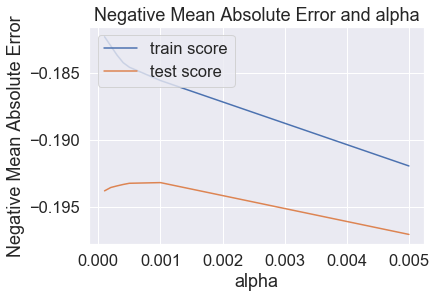

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [62]:
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
lasso.coef_

array([-0.        ,  0.        ,  0.08664103, -0.        , -0.        ,
       -0.        ,  0.55304766, -0.06444532,  0.20772123, -0.        ,
       -0.        , -0.        ,  0.11623739, -0.        , -0.        ,
        0.08391007,  0.        ,  0.15576464,  0.0742568 , -0.03385573,
       -0.05624163, -0.        , -0.17565135,  0.06314031, -0.        ,
        0.        , -0.        , -0.03851039, -0.20268308,  0.        ,
       -0.19858592,  0.        , -0.06044369,  0.1357289 , -0.00099644,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.08683339, -0.01513042,  0.        ,  0.05453414,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.08966558, -0.        , -0.03789757, -0.02111599,
       -0.        , -0.        , -0.        ,  0.04809579,  0.        ])

In [64]:
# Lasso parameters and corresponding coefficients
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lm.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = col
cols = cols.insert(0, "constant")
lasso_p = list(zip(cols, model_parameters))
lasso_p

[('constant', 277247816.182),
 ('Foundation_BrkTil', -0.0),
 ('Foundation_CBlock', 0.0),
 ('Foundation_PConc', 0.087),
 ('Foundation_Slab', -0.0),
 ('Foundation_Stone', -0.0),
 ('Foundation_Wood', -0.0),
 ('BsmtQual_Ex', 0.553),
 ('BsmtQual_Fa', -0.064),
 ('BsmtQual_Gd', 0.208),
 ('BsmtQual_None', -0.0),
 ('BsmtQual_TA', -0.0),
 ('BsmtCond_Fa', -0.0),
 ('BsmtCond_Gd', 0.116),
 ('BsmtCond_None', -0.0),
 ('BsmtCond_Po', -0.0),
 ('BsmtCond_TA', 0.084),
 ('BsmtExposure_Av', 0.0),
 ('BsmtExposure_Gd', 0.156),
 ('BsmtExposure_Mn', 0.074),
 ('BsmtExposure_No', -0.034),
 ('BsmtExposure_None', -0.056),
 ('BsmtFinType2_None', -0.0),
 ('Heating_Grav', -0.176),
 ('HeatingQC_Ex', 0.063),
 ('HeatingQC_Fa', -0.0),
 ('HeatingQC_Gd', 0.0),
 ('HeatingQC_Po', -0.0),
 ('HeatingQC_TA', -0.039),
 ('CentralAir_N', -0.203),
 ('CentralAir_Y', 0.0),
 ('GarageFinish_None', -0.199),
 ('GarageQual_Ex', 0.0),
 ('GarageQual_Fa', -0.06),
 ('GarageQual_Gd', 0.136),
 ('GarageQual_None', -0.001),
 ('GarageQual_Po', -0.0

In [65]:
# Creating a dataframe for features with corresponding co-efficients 
final_lasso = pd.DataFrame(lasso_p)

In [68]:
# Keeping only those features which have non-zero co-efficients
final_lasso = final_lasso[(final_lasso != 0).all(1)]
final_lasso

,0,1
0,constant,2.772478e+08
3,Foundation_PConc,8.700000e-02
7,BsmtQual_Ex,5.530000e-01
8,BsmtQual_Fa,-6.400000e-02
9,BsmtQual_Gd,2.080000e-01
13,BsmtCond_Gd,1.160000e-01
16,BsmtCond_TA,8.400000e-02
18,BsmtExposure_Gd,1.560000e-01
19,BsmtExposure_Mn,7.400000e-02
20,BsmtExposure_No,-3.400000e-02


As we can see, we get optimal feature reduction from Lasso where we are left with only top 25 features, whereas in case of Ridge, we have 60 features. 
Hence, Lasso is the preferred in this case. 